In [62]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "goldup"

## 1. Nạp các thư viện cần thiết

In [63]:
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(corrplot)
library(summarytools)


## 1. Import Data

In [64]:
library(readr)
gold_data <- read_csv("/kaggle/input/goldup/GoldUP.csv", show_col_types = FALSE)
gold_data$Date <- as.Date(gold_data$Date, format = "%d-%m-%Y")

## 2. EDA
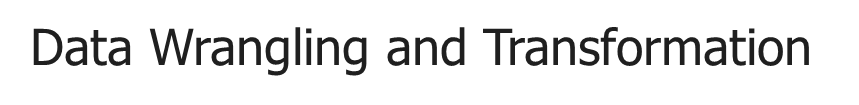
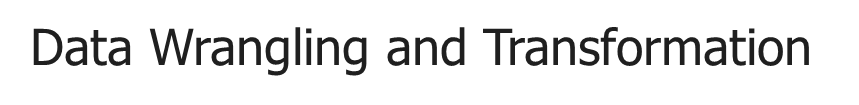
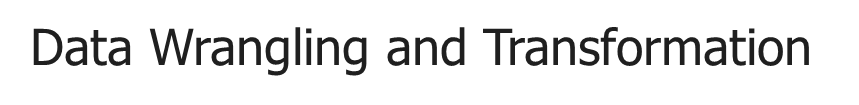
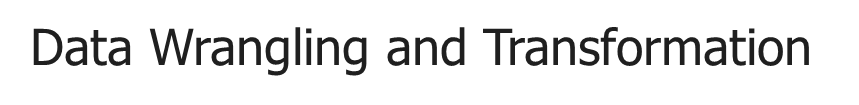

## 2.1. Đọc dữ liệu

In [122]:
gold_data <- read_csv("/kaggle/input/goldup/GoldUP.csv", show_col_types = FALSE)
head(gold_data)
summary(gold_data)

Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01-10-2000,4538,1455.51,8.0,46.31830,3711.02,37.23,116.65
01-11-2000,4483,1512.47,8.0,46.78361,3997.99,37.31,115.24
01-12-2000,4541,1178.11,8.0,46.74586,3972.12,36.98,109.56
01-01-2001,4466,1208.18,8.0,46.53603,4326.72,36.90,110.52
01-02-2001,4370,1267.18,7.5,46.51459,4247.04,36.73,112.01
01-03-2001,4269,1166.45,7.0,46.60935,3604.38,36.90,117.37


     Date             Gold_Price      Crude_Oil      Interest_Rate   
 Length:239         Min.   : 4267   Min.   : 887.4   Min.   : 4.250  
 Class :character   1st Qu.: 6712   1st Qu.:2180.7   1st Qu.: 6.000  
 Mode  :character   Median :19056   Median :3303.6   Median : 6.000  
                    Mean   :19299   Mean   :3397.7   Mean   : 6.716  
                    3rd Qu.:29364   3rd Qu.:4492.9   3rd Qu.: 7.000  
                    Max.   :52917   Max.   :6926.8   Max.   :10.250  
    USD_INR          Sensex           CPI           USD_Index     
 Min.   :39.37   Min.   : 2812   Min.   : 36.73   Min.   : 71.80  
 1st Qu.:45.47   1st Qu.: 8263   1st Qu.: 45.19   1st Qu.: 81.11  
 Median :48.66   Median :17465   Median : 68.47   Median : 88.94  
 Mean   :53.80   Mean   :18172   Mean   : 73.37   Mean   : 90.18  
 3rd Qu.:63.86   3rd Qu.:26662   3rd Qu.:101.37   3rd Qu.: 97.16  
 Max.   :76.22   Max.   :41254   Max.   :129.30   Max.   :120.24  

## 2.2. Kiểm tra thông tin thiếu

In [123]:
sum(is.na(gold_data))
colSums(is.na(gold_data))


[1] 0

Date    Gold_Price     Crude_Oil Interest_Rate       USD_INR 
            0             0             0             0             0 
       Sensex           CPI     USD_Index 
            0             0             0

In [124]:
gold_data <- gold_data %>% drop_na()


## 2.3. Phân tích phân phối (Histograms và Boxplots)

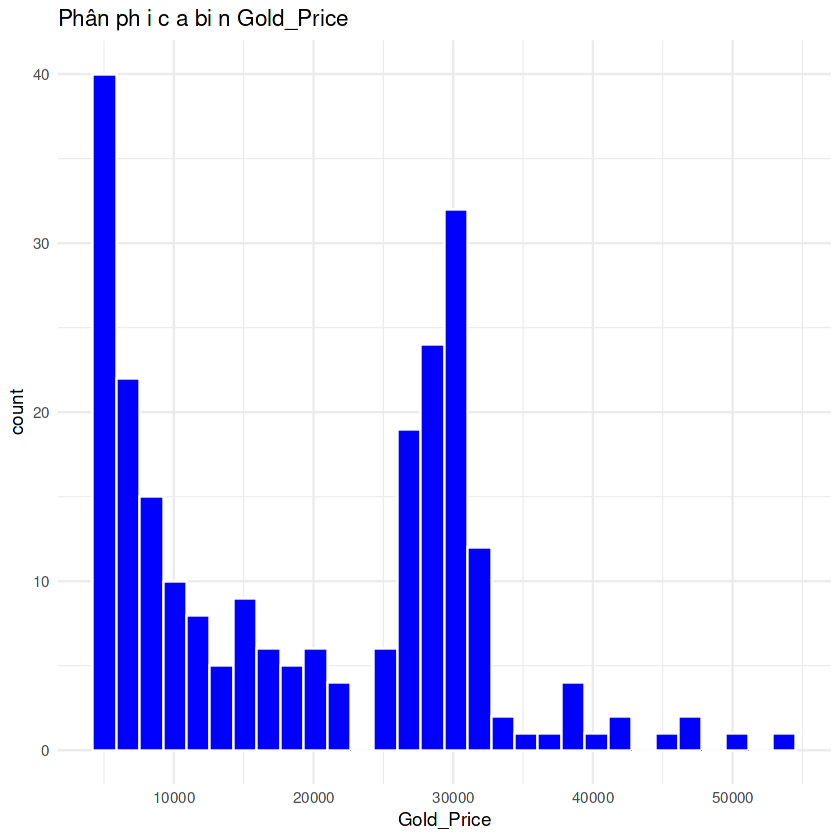

In [125]:
ggplot(gold_data, aes(x = Gold_Price)) + 
  geom_histogram(bins = 30, fill = "blue", color = "white") + 
  theme_minimal() +
  ggtitle("Phân phối của biến Gold_Price")


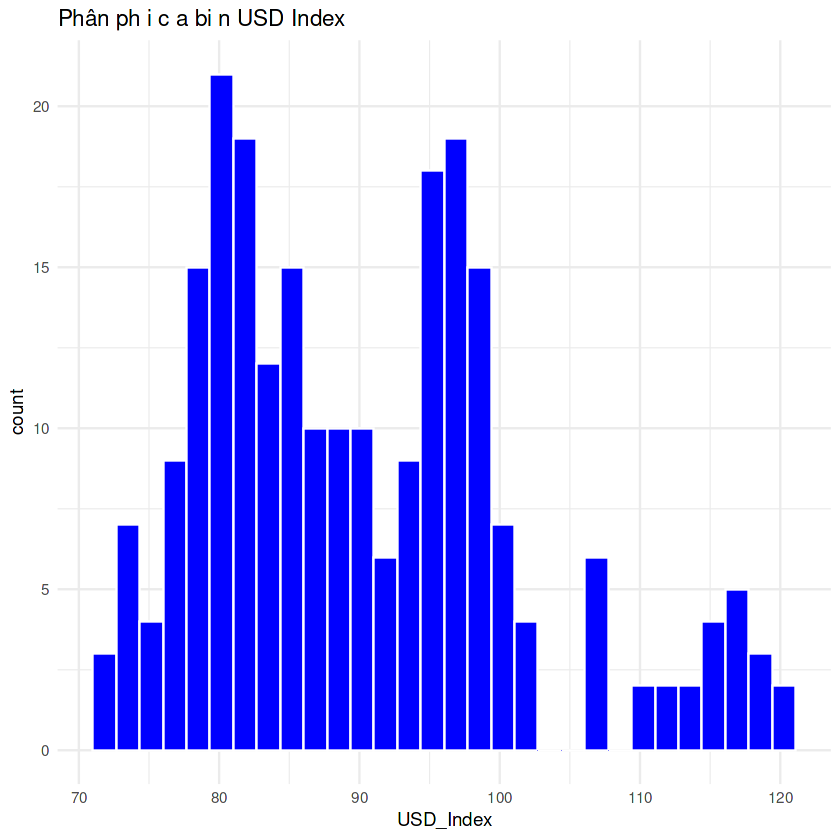

In [126]:
ggplot(gold_data, aes(x = USD_Index)) + 
  geom_histogram(bins = 30, fill = "blue", color = "white") + 
  theme_minimal() +
  ggtitle("Phân phối của biến USD Index")


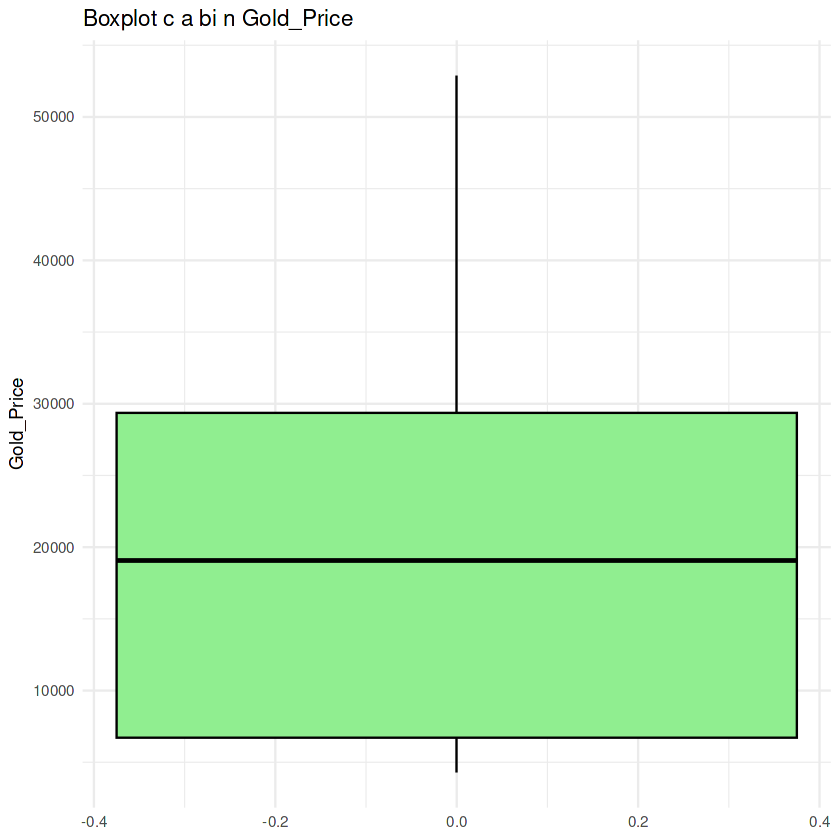

In [127]:
ggplot(gold_data, aes(y = Gold_Price)) + 
  geom_boxplot(fill = "lightgreen", color = "black") + 
  theme_minimal() +
  ggtitle("Boxplot của biến Gold_Price")


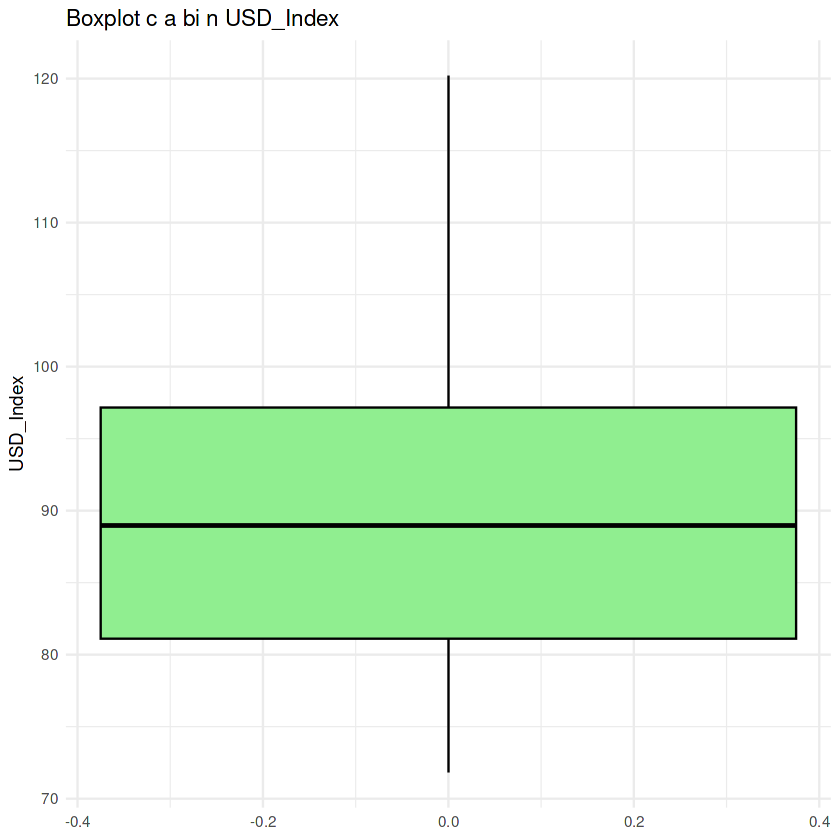

In [128]:
ggplot(gold_data, aes(y = USD_Index)) + 
  geom_boxplot(fill = "lightgreen", color = "black") + 
  theme_minimal() +
  ggtitle("Boxplot của biến USD_Index")


## 2.4. Quan hệ giữa các biến (Scatter plots và Correlation matrix)

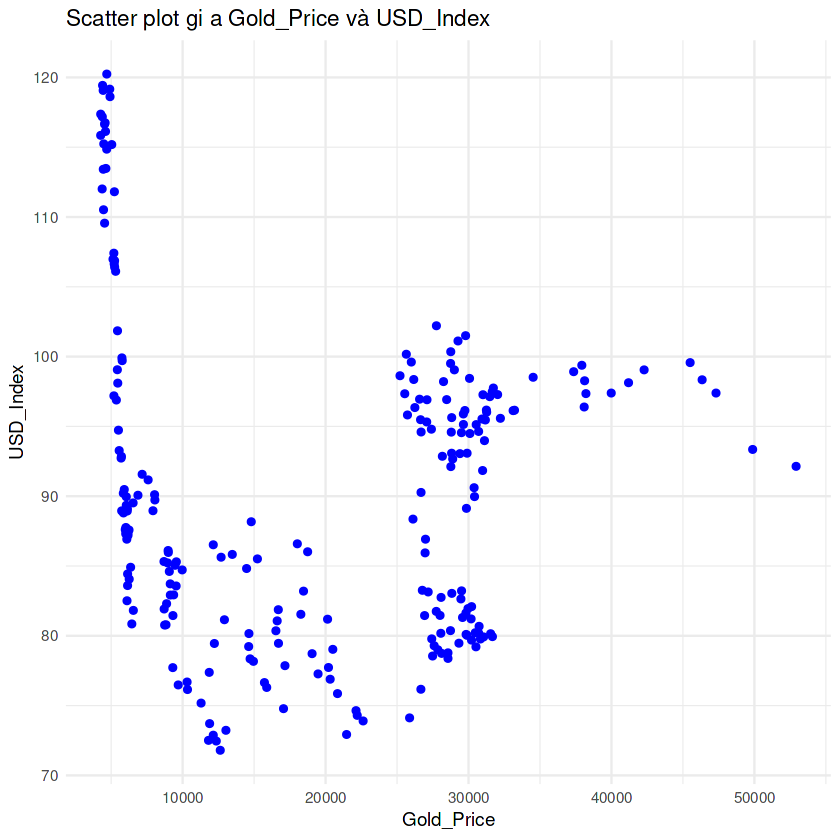

In [129]:
## Biểu đồ scatter plot để phân tích quan hệ giữa hai biến số:
ggplot(gold_data, aes(x = Gold_Price, y = USD_Index)) + 
  geom_point(color = "blue") + 
  theme_minimal() + 
  ggtitle("Scatter plot giữa Gold_Price và USD_Index")


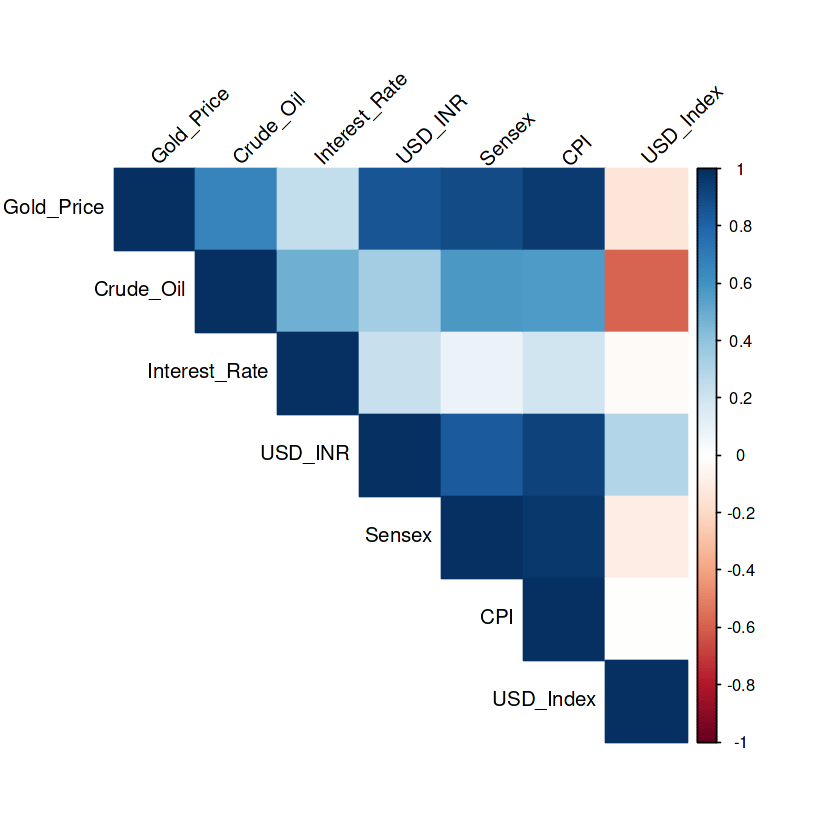

In [130]:
correlation_matrix <- cor(gold_data %>% select_if(is.numeric))
corrplot(correlation_matrix, method = "color", type = "upper", tl.col = "black", tl.srt = 45)


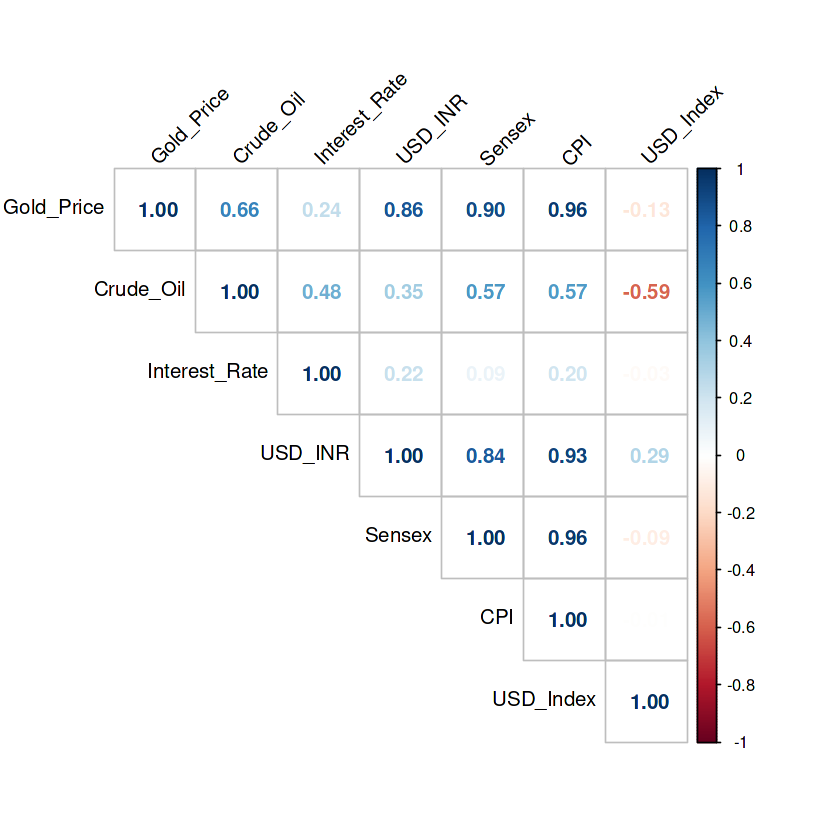

In [131]:
correlation_matrix <- cor(gold_data %>% select_if(is.numeric))
corrplot(correlation_matrix, method = "number", type = "upper", tl.col = "black", tl.srt = 45)


## 2.5. Visual hóa xu hướng theo thời gian

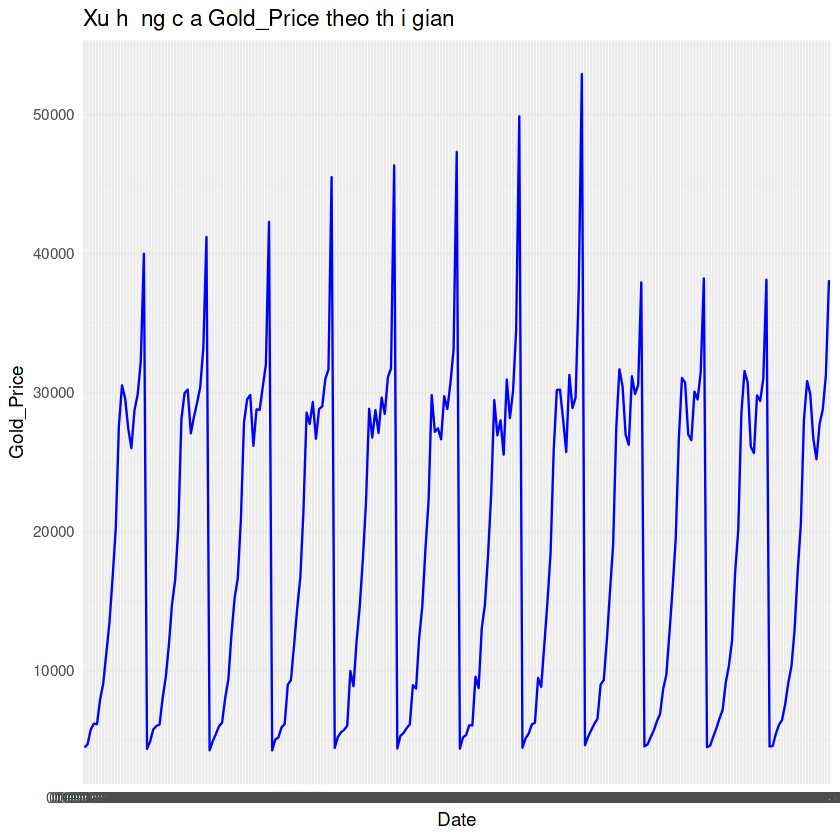

In [132]:
# Trực quan hóa xu hướng Gold_Price theo thời gian
ggplot(gold_data, aes(x = Date, y = Gold_Price, group = 1)) + 
  geom_line(color = "blue") + 
  theme_minimal() +
  ggtitle("Xu hướng của Gold_Price theo thời gian")

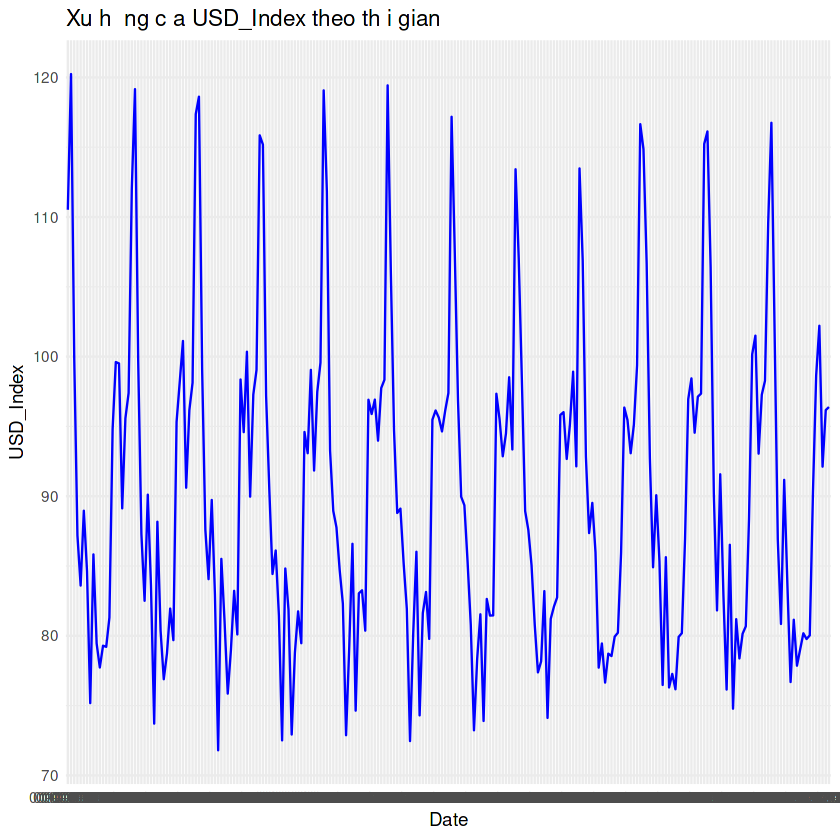

In [133]:
# Trực quan hóa xu hướng Gold_Price theo thời gian
ggplot(gold_data, aes(x = Date, y = USD_Index, group = 1)) + 
  geom_line(color = "blue") + 
  theme_minimal() +
  ggtitle("Xu hướng của USD_Index theo thời gian")

## 3. Thực hiện các bài test

In [134]:
# Tính hệ số tương quan Pearson
pearson_corr <- cor(gold_data[, c("Gold_Price", "Crude_Oil", "Interest_Rate", "USD_INR", "Sensex", "CPI", "USD_Index")], method = "pearson")

# ANOVA để kiểm tra ảnh hưởng của Interest_Rate lên Gold_Price
anova_result <- aov(Gold_Price ~ USD_Index, data = gold_data)
summary(anova_result)

# T-Test để kiểm tra sự khác biệt giữa Gold_Price và Crude_Oil
t_test_result <- t.test(gold_data$Gold_Price, gold_data$USD_Index)

# In kết quả
print("Pearson Correlation:")
print(pearson_corr)

             Df    Sum Sq   Mean Sq F value Pr(>F)  
USD_Index     1 5.714e+08 571429277   4.254 0.0402 *
Residuals   237 3.184e+10 134326978                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Pearson Correlation:"
              Gold_Price  Crude_Oil Interest_Rate   USD_INR      Sensex
Gold_Price     1.0000000  0.6616897    0.24199570 0.8555548  0.89749037
Crude_Oil      0.6616897  1.0000000    0.48456717 0.3481417  0.57050615
Interest_Rate  0.2419957  0.4845672    1.00000000 0.2224741  0.08623231
USD_INR        0.8555548  0.3481417    0.22247411 1.0000000  0.83807502
Sensex         0.8974904  0.5705062    0.08623231 0.8380750  1.00000000
CPI            0.9590482  0.5650253    0.19908195 0.9288145  0.96033420
USD_Index     -0.1327891 -0.5890536   -0.02568761 0.2902481 -0.09200408
                       CPI    USD_Index
Gold_Price     0.959048215 -0.132789075
Crude_Oil      0.565025318 -0.589053606
Interest_Rate  0.199081954 -0.025687614
USD_INR        0.928814544  0.290248080
Sensex         0.960334198 -0.092004080
CPI            1.000000000 -0.007089212
USD_Index     -0.007089212  1.000000000


In [135]:
print("ANOVA Result:")
print(summary(anova_result))

[1] "ANOVA Result:"
             Df    Sum Sq   Mean Sq F value Pr(>F)  
USD_Index     1 5.714e+08 571429277   4.254 0.0402 *
Residuals   237 3.184e+10 134326978                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- Giá trị F value = 4.254 và p-value = 0.0402 cho thấy rằng có sự khác biệt đáng kể giữa giá trị của Gold_Price theo biến USD_Index ở mức ý nghĩa 5% (p-value < 0.05).
- Vì p-value nhỏ hơn 0.05, ta có thể bác bỏ giả thuyết gốc rằng không có mối liên hệ giữa USD_Index và Gold_Price. Điều này có nghĩa là sự thay đổi của USD_Index có ảnh hưởng đáng kể đến giá trị của Gold_Price.


In [136]:
print("T-Test Result:")
print(t_test_result)

[1] "T-Test Result:"

	Welch Two Sample t-test

data:  gold_data$Gold_Price and gold_data$USD_Index
t = 25.449, df = 238, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 17721.94 20695.82
sample estimates:
  mean of x   mean of y 
19299.06276    90.18251 



## 4. Xây dựng mô hình hồi quy (chưa dùng Regularization hay GridSearch hay K-Fold)

In [137]:
gold_data <- gold_data[ , !names(gold_data) %in% c("Date")]
head(gold_data)
# Kiểm tra tên các cột
print(names(gold_data))

Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4538,1455.51,8.0,46.31830,3711.02,37.23,116.65
4483,1512.47,8.0,46.78361,3997.99,37.31,115.24
4541,1178.11,8.0,46.74586,3972.12,36.98,109.56
4466,1208.18,8.0,46.53603,4326.72,36.90,110.52
4370,1267.18,7.5,46.51459,4247.04,36.73,112.01
4269,1166.45,7.0,46.60935,3604.38,36.90,117.37


[1] "Gold_Price"    "Crude_Oil"     "Interest_Rate" "USD_INR"      
[5] "Sensex"        "CPI"           "USD_Index"    


In [138]:

gold_data <- gold_data[ , !(names(gold_data) %in% c("Interest_Rate","Crude_Oil", "USD_Index"))]


In [139]:
# Kiểm tra lại dữ liệu sau khi loại bỏ cột
print(head(gold_data))

# A tibble: 6 × 4
  Gold_Price USD_INR Sensex   CPI
       <dbl>   <dbl>  <dbl> <dbl>
1       4538    46.3  3711.  37.2
2       4483    46.8  3998.  37.3
3       4541    46.7  3972.  37.0
4       4466    46.5  4327.  36.9
5       4370    46.5  4247.  36.7
6       4269    46.6  3604.  36.9


In [143]:
# Tách dữ liệu thành biến đầu vào và biến mục tiêu
X <- gold_data[ , 2:4]  # Sử dụng các cột "USD_INR", "Sensex", và "CPI" làm biến đầu vào
y <- gold_data$Gold_Price  # "Gold_Price" là biến mục tiêu
# Tạo data frame từ X và y
data <- data.frame(X, y)

# Xây dựng linear model
model <- lm(y ~ ., data = data.frame(X, y))

# Dự đoán
y_pred <- predict(model, newdata = data.frame(X))

# Tính MSE
mse <- mean((y - y_pred)^2)
cat("MSE:", mse, "\n")

# Tính R²
r_squared <- summary(model)$r.squared
cat("R²:", r_squared, "\n")


MSE: 6312350 
R²: 0.9534466 


## 4.1 Xây dựng linear model dùng cross-validation, không regularization, không grid search (tính MSE và R²)

In [145]:
# Tách dữ liệu thành biến đầu vào và biến mục tiêu
X <- gold_data[ , 2:4]  # Sử dụng các cột "USD_INR", "Sensex", và "CPI" làm biến đầu vào
y <- gold_data$Gold_Price  # "Gold_Price" là biến mục tiêu

# Tạo data frame từ X và y
data <- data.frame(X, y)

# Thiết lập Cross-Validation (10-fold CV)
control <- trainControl(method = "cv", number = 5)

# Xây dựng linear model với cross-validation
model_cv <- train(y ~ ., data = data, method = "lm", trControl = control)

# Dự đoán
y_pred_cv <- predict(model_cv, newdata = data)

# Tính MSE cho cross-validation
mse_cv <- mean((data$y - y_pred_cv)^2)
cat("MSE (CV):", mse_cv, "\n")

# Tính R² cho cross-validation
r_squared_cv <- summary(model_cv$finalModel)$r.squared
cat("R² (CV):", r_squared_cv, "\n")


MSE (CV): 6312350 
R² (CV): 0.9534466 


## 4.2. Xây dựng linear model dùng cross-validation, có  regularization, không grid search (tính MSE và R²)

In [151]:
# Thư viện cho regularization
library(glmnet)

# Chuyển dữ liệu thành matrix cho glmnet
X_matrix <- as.matrix(X)
y_vector <- as.vector(y)

# Thiết lập Cross-Validation (10-fold CV) cho regularized linear model (Lasso)
cv_model <- cv.glmnet(X_matrix, y_vector, alpha = 0, nfolds = 10)  # alpha = 1 là Lasso, alpha = 0 là Ridge

# Dự đoán
y_pred_regular <- predict(cv_model, s = "lambda.min", newx = X_matrix)

# Tính MSE
mse_regular <- mean((y - y_pred_regular)^2)
cat("MSE (Regularized):", mse_regular, "\n")

# Tính R²
ss_total <- sum((y - mean(y))^2)
ss_residual <- sum((y - y_pred_regular)^2)
r_squared_regular <- 1 - (ss_residual / ss_total)
cat("R² (Regularized):", r_squared_regular, "\n")

MSE (Regularized): 14206654 
R² (Regularized): 0.8952264 


## 4.3. Xây dựng linear model dùng cross-validation, dùng regularization, và dùng grid search để tìm learning rate tốt nhất (tính MSE và R²):

In [154]:
# Thiết lập tham số grid search cho alpha và lambda
grid <- expand.grid(alpha = seq(0, 1, length = 10),    # alpha từ 0 đến 1 với 10 giá trị
                    lambda = 10^seq(-3, 3, length = 100))  # lambda từ 10^-3 đến 10^3

# Dùng cross-validation và regularization với grid search
model_grid <- train(y ~ ., data = data, method = "glmnet", 
                    trControl = trainControl(method = "cv", number = 10),
                    tuneGrid = grid)

# Dự đoán
y_pred_grid <- predict(model_grid, data)

# Tính MSE cho grid search
mse_grid <- mean((y - y_pred_grid)^2)
cat("MSE (Grid Search):", mse_grid, "\n")

# Tính R^2
ss_res <- sum((y - y_pred_grid)^2)  # Tổng bình phương phần dư (Residual Sum of Squares)
ss_tot <- sum((y - mean(y))^2)      # Tổng bình phương tổng (Total Sum of Squares)
r_squared_grid <- 1 - (ss_res / ss_tot)
cat("R² (Grid Search):", r_squared_grid, "\n")


MSE (Grid Search): 6319110 
R² (Grid Search): 0.9533968 
